In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Riccardo Malpica Galassi, Sapienza University, Roma, Italy
"""
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import PyCSP.Functions as csp
import PyCSP.ThermoKinetics as ctt


#create gas from original mechanism file hydrogen.cti
# gas = csp.CanteraCSP('hydrogen.yaml')
gas = ct.Solution('hydrogen.yaml')

print(dir(gas))

# #set the gas state
# T = 1000
# P = ct.one_atm
# #gas.TPX = T, P, "H2:2.0, O2:1, N2:3.76"
# gas.TP = T, P
# gas.set_equivalence_ratio(1.0, 'H2', 'O2:1, N2:3.76')

# #push pressure
# gas.constP = P

# #edit CSP parameters
# gas.jacobiantype='full'
# gas.rtol=1.0e-3
# gas.atol=1.0e-10

# #very important for SIM-constrained Jac
# gas.classify_traces=False

# #integrate ODE
# r = ct.IdealGasConstPressureReactor(gas)
# sim = ct.ReactorNet([r])
# time = 0.0
# states = ct.SolutionArray(gas, extra=['t'])


# evals = []
# evalsSIM = []


# sim.set_initial_time(0.0)
# while sim.time < 0.001:
#     sim.step()
#     states.append(r.thermo.state, t=sim.time)
#     print('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T, r.thermo.P, r.thermo.u))
#     lam,R,L,f = gas.get_kernel()
#     api, tpi, ifast, islow, species_type = gas.calc_CSPindices(API=False,Impo=False,species_type=True,TPI=False)
#     major = [i for i, x in enumerate(species_type) if x == "slow"]
    
#     jacSIM = gas.jacSIM(gas.jac,major,L)
#     lamSIM = np.zeros(len(lam))
#     lSIM,RSIM,LSIM = csp.eigsys(jacSIM)
#     lamSIM[:len(lSIM)]=lSIM
    
#     evals.append(lam)
#     evalsSIM.append(lamSIM)



# evals = np.array(evals)
# evalsSIM = np.array(evalsSIM)

# #plot eigenvalues of constrained model
# #evalM = utils.select_eval(evalsFull,MFull)
# logevals = np.clip(np.log10(1.0+np.abs(evals)),0,100)*np.sign(evals.real)
# #logevalM = np.clip(np.log10(1.0+np.abs(evalM)),0,100)*np.sign(evalM.real)
# logevalsC = np.clip(np.log10(1.0+np.abs(evalsSIM)),0,100)*np.sign(evalsSIM.real)
# print('plotting eigenvalues of full and constrained model...')
# fig, ax = plt.subplots(figsize=(6,4))
# for idx in range(evals.shape[1]):
#     ax.plot(states.t, logevals[:,idx], color='black', marker='.', markersize = 5,linestyle = 'None')
# for idx in range(evalsSIM.shape[1]):
#     ax.plot(states.t, logevalsC[:,idx], color='red', marker='.', markersize = 2,linestyle = 'None')
# #ax.plot(time, logevalM, color='orange', marker='.', markersize = 3,linestyle = 'None', label='lam(M+1) rtol e-2; atol e-8')
# ax.set_xlabel('time (s)')
# ax.set_ylabel('evals')
# ax.set_ylim([-9, 6])
# ax.set_xlim([0., max(states.t)])
# ax.grid(False)
# ax.legend()
# plt.savefig('jacobianSIM.png',dpi=800)

In [ ]:
gas.reaction_equations()

In [ ]:
gas.thermo_model

In [ ]:
gas.constP = 1
print(gas.g)
print(gas.generalized_Stoich_matrix_const_p)

In [ ]:
print(gas.n_elements)

In [ ]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*-

# Copyright (C) 2010 Modelon AB
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, version 3 of the License.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program. If not, see <http://www.gnu.org/licenses/>.

import numpy as N
import pylab as P
from assimulo.solvers import IDA
from assimulo.problem import Implicit_Problem
import nose

def run_example(with_plots=True):
    r"""
    Example for demonstrating the use of a user supplied Jacobian
    
    ODE:
    
    .. math::
       
        \dot y_1-y_3 &= 0 \\
        \dot y_2-y_4 &= 0 \\
        \dot y_3+y_5 y_1 &= 0 \\
        \dot y_4+y_5 y_2+9.82&= 0 \\
        y_3^2+y_4^2-y_5(y_1^2+y_2^2)-9.82 y_2&= 0 
    
    on return:
    
       - :dfn:`imp_mod`    problem instance
    
       - :dfn:`imp_sim`    solver instance
       
    """
    
    #Defines the residual
    def f(t,y,yd):
        
        res_0 = yd[0]-y[2]
        res_1 = yd[1]-y[3]
        res_2 = yd[2]+y[4]*y[0]
        res_3 = yd[3]+y[4]*y[1]+9.82
        res_4 = y[2]**2+y[3]**2-y[4]*(y[0]**2+y[1]**2)-y[1]*9.82

        return N.array([res_0,res_1,res_2,res_3,res_4])
    
    #Defines the Jacobian
    def jac(c,t,y,yd):
        jacobian = N.zeros([len(y),len(y)])
        
        #Derivative
        jacobian[0,0] = 1*c
        jacobian[1,1] = 1*c
        jacobian[2,2] = 1*c
        jacobian[3,3] = 1*c
        
        #Differentiated
        jacobian[0,2] = -1
        jacobian[1,3] = -1
        jacobian[2,0] = y[4]
        jacobian[3,1] = y[4]
        jacobian[4,0] = y[0]*2*y[4]*-1
        jacobian[4,1] = y[1]*2*y[4]*-1-9.82
        jacobian[4,2] = y[2]*2
        jacobian[4,3] = y[3]*2
        
        #Algebraic
        jacobian[2,4] = y[0]
        jacobian[3,4] = y[1]
        jacobian[4,4] = -(y[0]**2+y[1]**2)
        
        return jacobian
        
    #The initial conditons
    y0 = [1.0,0.0,0.0,0.0,5] #Initial conditions
    yd0 = [0.0,0.0,0.0,-9.82,0.0] #Initial conditions
    
    #Create an Assimulo implicit problem
    imp_mod = Implicit_Problem(f,y0,yd0,name = 'Example using an analytic Jacobian')
    
    #Sets the options to the problem
    imp_mod.jac = jac #Sets the jacobian
    imp_mod.algvar = [1.0,1.0,1.0,1.0,0.0] #Set the algebraic components

    
    #Create an Assimulo implicit solver (IDA)
    imp_sim = IDA(imp_mod) #Create a IDA solver
    
    #Sets the paramters
    imp_sim.atol = 1e-6 #Default 1e-6
    imp_sim.rtol = 1e-6 #Default 1e-6
    imp_sim.suppress_alg = True #Suppres the algebraic variables on the error test
    
    #Let Sundials find consistent initial conditions by use of 'IDA_YA_YDP_INIT'
    imp_sim.make_consistent('IDA_YA_YDP_INIT')
    
    #Simulate
    t, y, yd = imp_sim.simulate(5,1000) #Simulate 5 seconds with 1000 communication points
    
    #Basic tests
    nose.tools.assert_almost_equal(y[-1][0],0.9401995, places=4)
    nose.tools.assert_almost_equal(y[-1][1],-0.34095124, places=4)
    nose.tools.assert_almost_equal(yd[-1][0], -0.88198927, places=4)
    nose.tools.assert_almost_equal(yd[-1][1], -2.43227069, places=4)
    
    #Plot
    if with_plots:
        P.plot(t,y,linestyle="dashed",marker="o") #Plot the solution
        P.xlabel('Time')
        P.ylabel('State')
        P.title(imp_mod.name)
        P.show()
        
    return imp_mod, imp_sim



if __name__=='__main__':
    mod,sim = run_example()

In [ ]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*-
"""
Tutorial example showing how to use the implicit solver IDA. To run the example
simply type,

    run tutorialIDA.py (in IPython)
    
or,

    python tutorialIDA.py (in a command prompt)
"""
import numpy as np
from assimulo.problem import Implicit_Problem #Imports the problem formulation from Assimulo
from assimulo.solvers import IDA              #Imports the solver IDA from Assimulo


def run_example():

    def residual(t,y,yd):

        res_0 = yd[0]-y[2]
        res_1 = yd[1]-y[3]
        res_2 = yd[2]+y[4]*y[0]
        res_3 = yd[3]+y[4]*y[1]+9.82
        res_4 = y[2]**2+y[3]**2-y[4]*(y[0]**2+y[1]**2)-y[1]*9.82

        return np.array([res_0,res_1,res_2,res_3,res_4])
    
    #The initial conditons
    t0  = 0.0 #Initial time
    y0  = [1.0, 0.0, 0.0, 0.0, 0.0] #Initial conditions
    #yd0 = [0.0, 0.0, 0.0, -9.82, 0.0] #Initial conditions
    yd0 = [0.0, 0.0, 0.0, 0.0, 0.0] #Initial conditions

    model = Implicit_Problem(residual, y0, yd0, t0)             #Create an Assimulo problem
    model.name = 'Pendulum'        #Specifies the name of problem (optional)

    sim = IDA(model) #Create the IDA solver
        
    tfinal = 10.0        #Specify the final time
    ncp = 500            #Number of communcation points (number of return points)

    t,y,yd = sim.simulate(tfinal, ncp) #Use the .simulate method to simulate and provide the final time and ncp (optional)
    
    sim.plot()

if __name__=='__main__':
    run_example()

t 1e-05 y [1.000000e-07 1.000000e-07 1.000000e-07 1.000000e-07 9.999995e-01]
r111 [ 1.68188954e+00  4.91205611e+00  1.33431496e+06 -6.32863496e-05
  5.15501395e+07]
dr [1334313.281991744, -3.230166572483734, 4.911992823641978, 103100285.6217477, -104434605.49755852]
res_list [-1334313.271991744, 3.2401665724837336, -4.9019928236419785, -103100285.6117477, 1.1102230246251565e-16] 

t 1e-05 y [1.100000e-06 1.000000e-07 1.000000e-07 1.000000e-07 9.999995e-01]
r111 [ 1.85007850e+01  4.91205611e+00  1.33006801e+06 -6.32863496e-05
  5.15501395e+07]
dr [1330049.5129006777, 13.588728895851137, 4.911992823641978, 103100302.44064316, -104430375.3662584]
res_list [-1330049.4029006776, -13.578728895851135, -4.9019928236419785, -103100302.43064317, -9.999999999177334e-07] 

t 1e-05 y [1.000000e-07 1.100000e-06 1.000000e-07 1.000000e-07 9.999995e-01]
r111 [ 1.68188944e+00  5.40326172e+01  1.33431496e+06 -6.32863496e-05
  5.15501395e+07]
dr [1334313.281991837, -52.35072777331059, 54.032553931212114, 

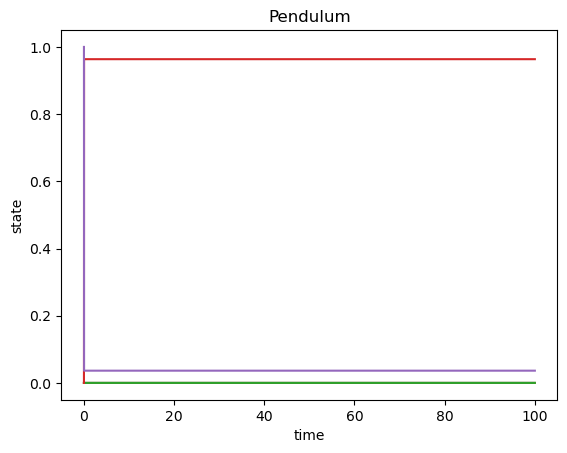

In [6]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*-
"""
Tutorial example showing how to use the implicit solver IDA. To run the example
simply type,

    run tutorialIDA.py (in IPython)
    
or,

    python tutorialIDA.py (in a command prompt)
"""
import numpy as np
import casadi as cd
from assimulo.problem import Implicit_Problem #Imports the problem formulation from Assimulo
from assimulo.solvers import IDA              #Imports the solver IDA from Assimulo


def run_example():

    def residual(t,y,yd):
        # print("t", t, "y", y, "yd", yd)
        print("t", t, "y", y)
        kb = 8.617333262e-5 #0.00008617333262
        h = 4.135667696e-15
        
        #Operating conditions
        T = 573.15
        PCH3CH3 = 0.01
        PCH2CH2 = 0
        PH2 = 0.1

        Ptot = PCH3CH3 + PCH2CH2 + PH2
        
        x = np.zeros(3)
        x[0] = PCH3CH3 / Ptot
        x[1] = PCH2CH2 / Ptot
        x[2] = PH2 / Ptot
        
        dG_act = np.zeros(5)
        dG_rxn = np.zeros(5)

        dG_act[0] = 0.665440272559977
        dG_act[1] = 0.612505031110020
        dG_act[2] = 0.563133146846930
        dG_act[3] = 0.561419483475600
        dG_act[4] = 0.496395364620770

        dG_rxn[0] = -0.142852277000000
        dG_rxn[1] = -0.319265316000000
        dG_rxn[2] = 0.170892692415058
        dG_rxn[3] = -0.607196722455648
        dG_rxn[4] = -0.437181472472370

        k_f = [(kb * T / h) * np.exp(-(j) / (kb * T)) for j in dG_act]
        K_eq = [np.exp(-(j) / (kb * T)) for j in dG_rxn]
        k_b = [k_f[j] / K_eq[j] for j in range(len(k_f))]

        r111 = np.zeros(5)

        r111[0] = k_f[0]*y[0]*y[4] - k_b[0]*y[1]*y[3] 
        r111[1] = k_f[1]*y[1]*y[4]**2 - k_b[1]*y[2]*y[3]
        r111[2] = k_f[2]*x[0]*Ptot*y[4] - k_b[2]*y[0]
        r111[3] = k_f[3]*x[1]*Ptot*y[4]**2 - k_b[3]*y[2]
        r111[4] = k_f[4]*x[2]*Ptot*y[4]**2 - k_b[4]*y[3]**2

        print("r111", r111)

        dr = [
            r111[2] - r111[0],
            r111[0] - r111[1],
            r111[1] + r111[3],
            r111[0] + r111[1] + 2 * r111[4],
            - (r111[0] + r111[2]) - 2 * (r111[1] + r111[3] + r111[4])
        ]

        print("dr", dr)

        res_0 = yd[0] - r111[2] + r111[0]
        res_1 = yd[1] - r111[0] + r111[1]
        res_2 = yd[2] - r111[1] - r111[3]
        res_3 = yd[3] - r111[0] - r111[1] - 2 * r111[4]
        res_4 = 1 - y[0] - y[1] - 2 * y[2] - y[3] - y[4]

        #mass_matrix = 
        res_list = [res_0,res_1,res_2,res_3,res_4]
        print("res_list", res_list, '\n')

        return np.array(res_list)

    def get_Analytical_Jacobian(y):
        dl_yd = cd.MX.sym('dl_yd', 1, len(y))
        dl_y = cd.MX.sym('dl_y', 1, len(y))
        dl_r111 = cd.MX(1, len(y))

        dl_r111_arr = np.zeros(len(y))
        dl_yd_arr = np.zeros(len(y))
        dl_r111_arr = cd.horzsplit(dl_r111)
        dl_yd_arr = cd.horzsplit(dl_y)
        
        kb = 8.617333262e-5 #0.00008617333262
        h = 4.135667696e-15
        
        #Operating conditions
        T = 573.15
        PCH3CH3 = 0.01
        PCH2CH2 = 0
        PH2 = 0.1

        Ptot = PCH3CH3 + PCH2CH2 + PH2
        
        x = np.zeros(3)
        x[0] = PCH3CH3 / Ptot
        x[1] = PCH2CH2 / Ptot
        x[2] = PH2 / Ptot
        
        dG_act = np.zeros(5)
        dG_rxn = np.zeros(5)

        dG_act[0] = 0.665440272559977
        dG_act[1] = 0.612505031110020
        dG_act[2] = 0.563133146846930
        dG_act[3] = 0.561419483475600
        dG_act[4] = 0.496395364620770

        dG_rxn[0] = -0.142852277000000
        dG_rxn[1] = -0.319265316000000
        dG_rxn[2] = 0.170892692415058
        dG_rxn[3] = -0.607196722455648
        dG_rxn[4] = -0.437181472472370

        k_f = [(kb * T / h) * np.exp(-(j) / (kb * T)) for j in dG_act]
        K_eq = [np.exp(-(j) / (kb * T)) for j in dG_rxn]
        k_b = [k_f[j] / K_eq[j] for j in range(len(k_f))]

        # dl_k_f = cd.MX(k_f[:])
        # dl_k_b = cd.MX(k_b[:])
        # dl_K_eq = cd.MX(K_eq[:])

        r111 = np.zeros(5)

        r111[0] = k_f[0]*y[0]*y[4]-k_b[0]*y[1]*y[3] 
        r111[1] = k_f[1]*y[1]*y[4]**2-k_b[1]*y[2]*y[3]
        r111[2] = k_f[2]*x[0]*Ptot*y[4]-k_b[2]*y[0]
        r111[3] = k_f[3]*x[1]*Ptot*y[4]**2-k_b[3]*y[2]
        r111[4] = k_f[4]*x[2]*Ptot*y[4]**2-k_b[4]*y[3]**2

        dl_r111_arr[0] = k_f[0]*dl_y[0]*dl_y[4]-k_b[0]*dl_y[1]*dl_y[3]
        dl_r111_arr[1] = k_f[1]*dl_y[1]*dl_y[4]**2-k_b[1]*dl_y[2]*dl_y[3]
        dl_r111_arr[2] = k_f[2]*x[0]*Ptot*dl_y[4]-k_b[2]*dl_y[0]
        dl_r111_arr[3] = k_f[3]*x[1]*Ptot*dl_y[4]**2 - k_b[3]*dl_y[2]
        dl_r111_arr[4] = k_f[4]*x[2]*Ptot*dl_y[4]**2 - k_b[4]*dl_y[3]**2

        dl_r111 = cd.horzcat(*tuple(dl_r111_arr))

        dl_yd_arr[0] = dl_r111[2]-dl_r111[0]
        dl_yd_arr[1] = dl_r111[0]-dl_r111[1]
        dl_yd_arr[2] = dl_r111[1] + dl_r111[3]
        dl_yd_arr[3] = dl_r111[0] + dl_r111[1] + 2 * dl_r111[4]
        dl_yd_arr[4] = - dl_yd_arr[0] - 2 * dl_yd_arr[1] - 2 * dl_yd_arr[2] - dl_yd_arr[3] - 2 * dl_yd_arr[4]

        dl_yd = cd.horzcat(*tuple(dl_yd_arr))

        J_raw = cd.jacobian(dl_yd, dl_y)

        # J_fn = cd.Function('J_fn', {dl_dy}, {J_raw}) # Matlab syntax
        J_fn = cd.Function('J_fn', [dl_y], [J_raw])
        # J_full = cd.full(J_fn(y))

        return J_fn(y)


    
    #The initial conditons
    t0  = 0.00 #Initial time
    y0  = [0.0, 0.0, 0.0, 0.0, 1.0] #Initial conditions
    yd0 = [0.01, 0.01, 0.01, 0.01, -0.05] #Initial conditions
    # yd0 = [0.0, 0.0, 0.0, 0.0, -0.00] #Initial conditions

    model = Implicit_Problem(residual, y0, yd0, t0)             #Create an Assimulo problem
    model.name = 'Pendulum'        #Specifies the name of problem (optional)

    sim = IDA(model) #Create the IDA solver

    tfinal = 100.0        #Specify the final time
    ncp = 10000            #Number of communcation points (number of return points)

    t, y, yd = sim.simulate(tfinal, ncp) #Use the .simulate method to simulate and provide the final time and ncp (optional)

    print("y", y[-1])
    # print("dy", yd[-1])

    print(get_Analytical_Jacobian(y[-1]))
    
    sim.plot()

if __name__=='__main__':
    run_example()

In [ ]:
import cantera as ct

In [ ]:
dir(ct.Solution)

In [ ]:
import casadi as cd

In [ ]:
x = cd.SX.sym('x', 2, 2)
y = cd.SX.sym('y')
f = 3*x + y
# f = sqrt(f)
print(f)
f.full()

In [ ]:
f_fun = cd.Function('f_fun', [x, y], [f])
f_full = cd.evalf(cd.substitute(f, x, cd.SX([[1.0, 0.0],[0.0, 1.0]]), y, 2.))

In [ ]:
x = cd.SX.sym('x'); z = cd.SX.sym('z'); p = cd.SX.sym('p')
dae = {'x':x, 'z':z, 'p':p, 'ode':z+p, 'alg':z*cd.cos(z)-x}
F = cd.integrator('F', 'idas', dae)
print(F)
# F.full()

In [ ]:
r = F(x0=0, z0=0, p=0.1)
print(r['xf'])

In [ ]:
C = cd.DM(2,3)

C_dense = C.full()
C_dense

In [ ]:
C_sparse = C.sparse()
C_sparse

In [ ]:
Z = SX.sym('Z',4,2)


In [ ]:
print(gas.product_stoich_coeff())

In [ ]:
x = cd.MX(1,2)
x[0] = 2.0
x[1] = 3.0

In [ ]:
f = x**2+10

In [ ]:
f

In [ ]:
# Python
from casadi import *

# Formulate the ODE
x=SX.sym('x',2)
p=SX.sym('p')
z=1-x[1]**2
f=vertcat(z*x[0]-x[1]+p,\
          x[0])
dae=dict(x=x,p=p,ode=f)

# Create solver instance
op=dict(t0=0,tf=1)
F=integrator('F','cvodes',dae,op)

# Solve the problem
r=F(x0=[0,1],p=0.1)
print(r['xf'])

# Create Jacobian function
D=F.factory('D',['x0','p'],['jac:xf:x0'])

# Solve the problem
r=D(x0=[0,1],p=0.1)
print(r['jac_xf_x0'])

In [ ]:
x = cd.SX.sym('x'); z = cd.SX.sym('z'); p = cd.SX.sym('p')
dae = {'x':x, 'z':z, 'p':p, 'ode':z+p, 'alg':z*cd.cos(z)-x}
F = cd.integrator('F', 'idas', dae)
print(F)
# F.full()